# CardioCare 
A Machine Learning-Based Cardiac Disease Classification System

## Importing the data📊:

In [3]:
import pandas as pd
data=pd.read_csv('heart.csv')
data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Preparing the tools🔧

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Visualizing the data

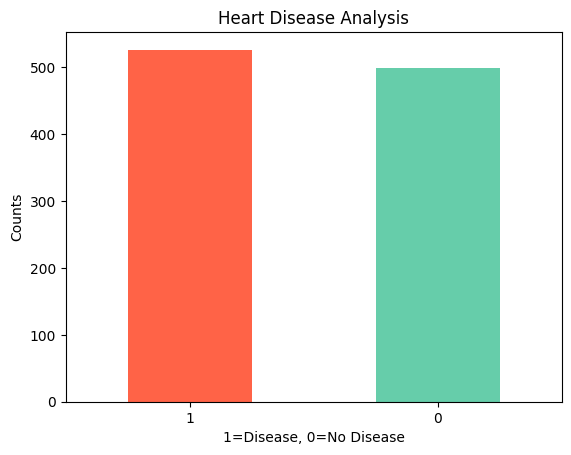

In [9]:
data["target"].value_counts().plot(kind='bar',title='Heart Disease Analysis', 
                                   xlabel='1=Disease, 0=No Disease', 
                                   ylabel='Counts',
                                   color=["tomato", "mediumaquamarine"]);
plt.xticks(rotation=0);

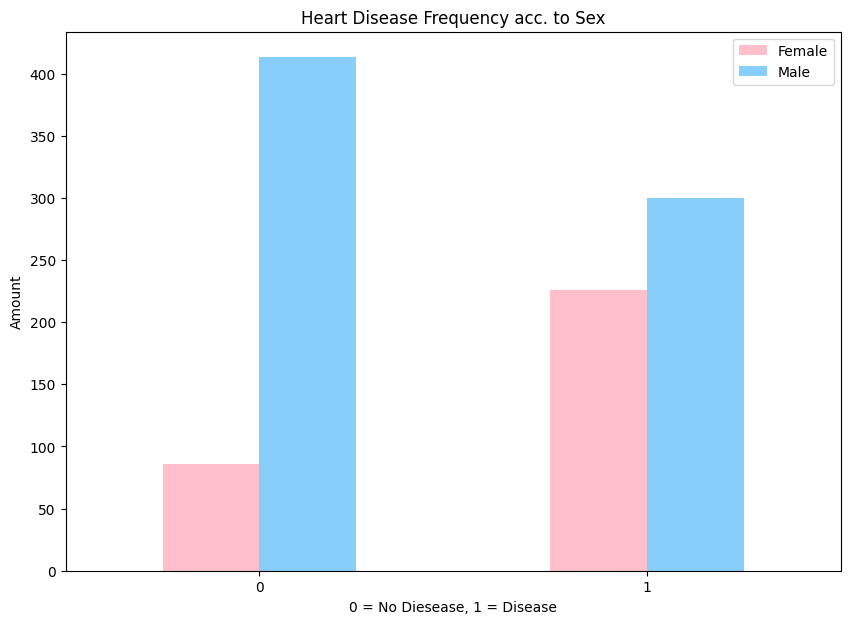

In [10]:
# Create a plot of crosstab
pd.crosstab(data.target, data.sex).plot(kind="bar",
                                    figsize=(10,7),
                                    color=["pink", "lightskyblue"])

plt.title("Heart Disease Frequency acc. to Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Heart Disease Frequency per Chest Pain Type

*   cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

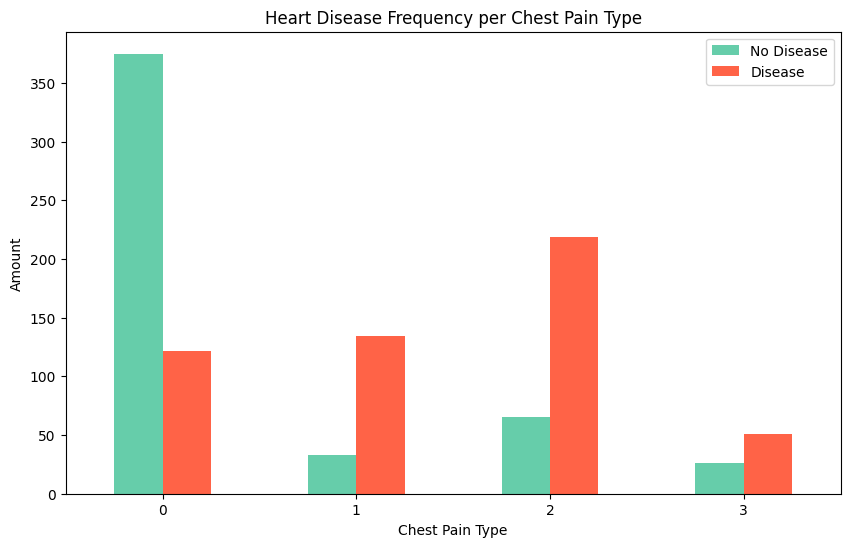

In [11]:
pd.crosstab(data.cp, data.target).plot(kind='bar',
                                  figsize = (10,6),
                                  color = ["mediumaquamarine", "tomato" ])

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

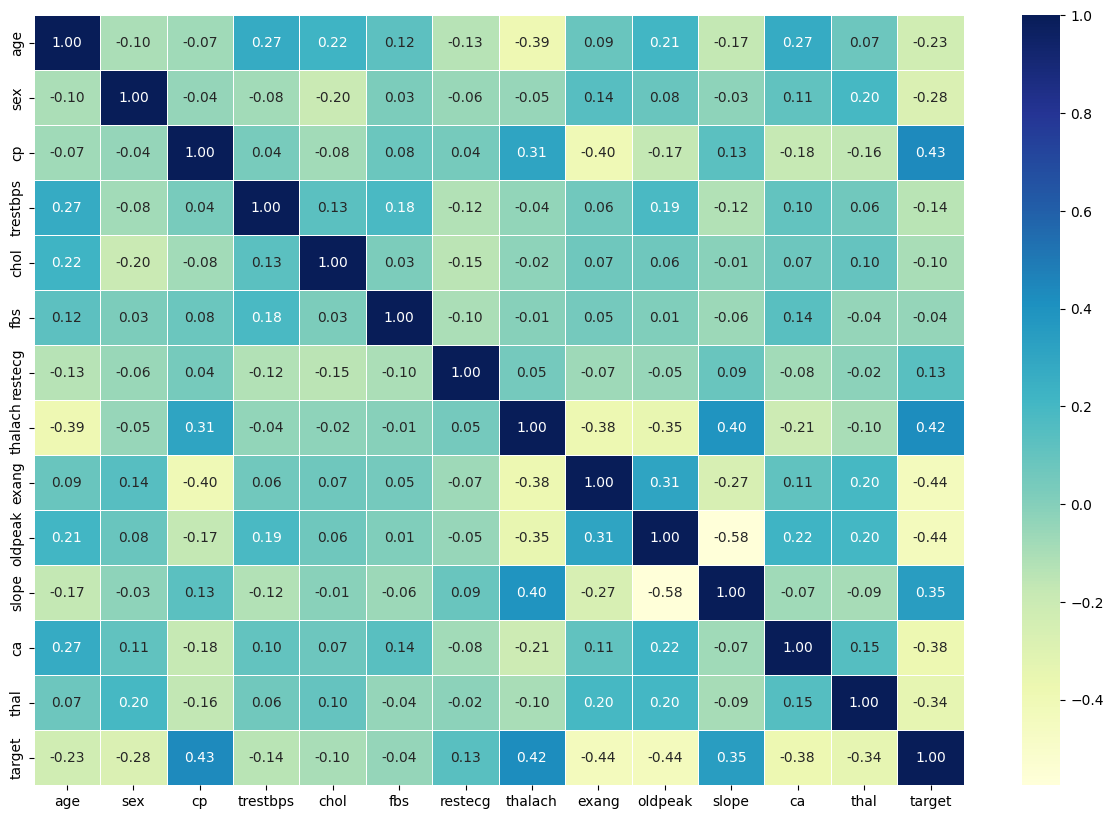

In [12]:
## Correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Training the data💻

In [13]:
X = data.drop('target',axis=1)
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

LR_classifier = LogisticRegression(random_state=0,  max_iter=1000)

clf = svm.SVC()

sgd=SGDClassifier()

forest=RandomForestClassifier(n_estimators=20, random_state=12,max_depth=6)

treee = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)


LR_classifier.fit(X_train, y_train)
clf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
treee.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=20, random_state=12)

### Training Accuracy

In [14]:
y_pred=LR_classifier.predict(X_train)
y_predsvm=clf.predict(X_train)
y_predsgd=sgd.predict(X_train)
y_predtree=treee.predict(X_train)
y_predforest=forest.predict(X_train)


print(accuracy_score(y_train, y_pred))
print(accuracy_score(y_train, y_predsvm))
print(accuracy_score(y_train, y_predsgd))
print(accuracy_score(y_train, y_predtree))
print(accuracy_score(y_train, y_predforest))

0.8479776847977685
0.691771269177127
0.7726638772663877
0.9539748953974896
0.9735006973500697


## Test Accuracy

In [15]:
y_pred=LR_classifier.predict(X_test)
y_predsvm=clf.predict(X_test)
y_predsgd=sgd.predict(X_test)
y_predtree=treee.predict(X_test)
y_predforest=forest.predict(X_test)


print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_predsvm))
print(accuracy_score(y_test, y_predsgd))
print(accuracy_score(y_test, y_predtree))
print(accuracy_score(y_test, y_predforest))

0.8668831168831169
0.75
0.7922077922077922
0.9188311688311688
0.9642857142857143


We choose RandomForest since it has the highest accuracy

## Using the Pickle Module:

In [16]:
import pickle
pickle.dump(forest, open('heart_disease_model.pkl', 'wb'))